In [1]:
# First create a directory 'wd'
#!mkdir wd
%cd wd


l:\Users\Kyle\Documents\University of Minnesota\PrionAnalysis\VSCodeWorkspace\refiles\wd


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score, average_precision_score
import random
import string
import pickle

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

SEED = 2022

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:585: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# NEED TO RESTART RUNTIME AFTER THIS
%pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\kyleh\\anaconda3\\envs\\tf-keras-gpu\\lib\\site-packages\\numpy-1.22.3.dist-info\\METADATA'



In [ ]:
TIME_INCREMENT = 0.25

# Set up

## Read in data

In [ ]:
# Set file names
files =  ["Compiled_Data.csv", "stuart_TRno307.CSV", "stuart_TRno309.CSV", "stuart_TRno310.CSV"]

In [ ]:
# Read in data
data = {}
for filename in files:
    data[filename] = pd.read_csv(filename, header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'Compiled_Data.csv'

In [ ]:
# Append filename to replicate ID in each file
def append_filename(x, suffix):
    if pd.isnull(x):
        return x
    else:
        return x + '|' + suffix

for filename,df in data.items():
    # Print replicate IDs before
    print("Before: ", end="")
    print(df.iloc[2,:10].tolist())
    # Append filename to replicate ID
    df.iloc[2,:] = df.iloc[2,:].apply(lambda x: append_filename(x, suffix=filename.split('.')[0]))
    # Print replicate IDs after
    print("After: ", end="")
    print(df.iloc[2,:10].tolist())

Before: [nan, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
After: [nan, 'A|Compiled_Data', 'A|Compiled_Data', 'A|Compiled_Data', 'A|Compiled_Data', 'A|Compiled_Data', 'A|Compiled_Data', 'A|Compiled_Data', 'A|Compiled_Data', 'B|Compiled_Data']
Before: [nan, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
After: [nan, 'A|stuart_TRno307', 'A|stuart_TRno307', 'A|stuart_TRno307', 'A|stuart_TRno307', 'A|stuart_TRno307', 'A|stuart_TRno307', 'A|stuart_TRno307', 'A|stuart_TRno307', 'B|stuart_TRno307']
Before: [nan, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
After: [nan, 'A|stuart_TRno309', 'A|stuart_TRno309', 'A|stuart_TRno309', 'A|stuart_TRno309', 'A|stuart_TRno309', 'A|stuart_TRno309', 'A|stuart_TRno309', 'A|stuart_TRno309', 'B|stuart_TRno309']
Before: [nan, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B']
After: [nan, 'A|stuart_TRno310', 'A|stuart_TRno310', 'A|stuart_TRno310', 'A|stuart_TRno310', 'A|stuart_TRno310', 'A|stuart_TRno310', 'A|stuart_TRno310', 'A|stuart_TRno310', 'B|stuart_TRno310']


In [ ]:
data["Compiled_Data.csv"]  # interactive

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
0,Status,Pos,Pos,Pos,Pos,Pos,Pos,Pos,Pos,Pos,...,Neg,Neg,Neg,Neg,Neg,Neg,Neg,Neg,Neg,Neg
1,Sample,Obex,Obex,Obex,Obex,Obex,Obex,Obex,Obex,Soil,...,RPLN,RPLN,RPLN,RPLN,RPLN,RPLN,RPLN,RPLN,RPLN,Obex
2,NaN,A|Compiled_Data,A|Compiled_Data,A|Compiled_Data,A|Compiled_Data,A|Compiled_Data,A|Compiled_Data,A|Compiled_Data,A|Compiled_Data,B|Compiled_Data,...,AHR|Compiled_Data,AHS|Compiled_Data,AHT|Compiled_Data,AHU|Compiled_Data,AHV|Compiled_Data,AHW|Compiled_Data,AHX|Compiled_Data,AHY|Compiled_Data,AHZ|Compiled_Data,AIA|Compiled_Data
3,Time [h],Sample X1,Sample X13,Sample X25,Sample X37,Sample X49,Sample X61,Sample X73,Sample X85,Sample X4,...,Sample X87,Sample X88,Sample X89,Sample X90,Sample X91,Sample X92,Sample X93,Sample X94,Sample X95,Sample X96
4,0,26094,23708,23697,21975,22571,23018,21295,20118,24642,...,8351,8538,8577,8310,8409,8398,8925,8649,8739,8604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,47,49461,45421,50333,42282,47454,50290,48210,48006,35541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,47.25,49929,50124,48830,42325,47514,50953,48838,47907,34918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,47.5,49872,47959,45010,42041,47339,50035,48609,48203,33875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,47.75,49527,47422,46204,42045,46774,49934,47627,47440,33898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["stuart_TRno307.CSV"]  # interactive

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,384
0,Status,Pos,Pos,Pos,Pos,Pos,Pos,Pos,Pos,Neg,...,Neg,Neg,Neg,Neg,Neg,Neg,Neg,Neg,Neg,Neg
1,Sample,Obex,Obex,Obex,Obex,Obex,Obex,Obex,Obex,Soil,...,Soil,Soil,Obex,Obex,Obex,Obex,Obex,Obex,Obex,Obex
2,NaN,A|stuart_TRno307,A|stuart_TRno307,A|stuart_TRno307,A|stuart_TRno307,A|stuart_TRno307,A|stuart_TRno307,A|stuart_TRno307,A|stuart_TRno307,B|stuart_TRno307,...,AU|stuart_TRno307,AU|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307,AV|stuart_TRno307
3,Time [h],Sample X1,Sample X2,Sample X3,Sample X4,Sample X5,Sample X6,Sample X7,Sample X8,Sample X9,...,Sample X375,Sample X376,Sample X377,Sample X378,Sample X379,Sample X380,Sample X381,Sample X382,Sample X383,Sample X384
4,0,7742,9358,6732,9292,8693,9115,9361,8328,6369,...,5875,5007,5404,7056,5499,6496,5866,5187,5098,4888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,47,170446,120749,183005,182975,174435,198922,150724,167252,4134,...,119205,105580,4925,6023,6427,5190,5322,4562,4583,4565
193,47.25,169176,120477,182995,184018,174819,199979,151514,167945,4038,...,118795,105734,4905,6061,6360,5105,5272,4636,4582,4615
194,47.5,171596,121787,184918,184144,175485,200454,152026,168858,4081,...,118557,100716,4886,6049,6457,5165,5261,4596,4508,4555
195,47.75,171549,121422,184434,183356,175195,200677,151753,167842,4148,...,119565,101086,4916,6154,6551,5163,5314,4646,4600,4646


In [ ]:
for filename,df in data.items():
    print(filename + ": \t", end='')
    print(df.shape)

Compiled_Data.csv: 	(197, 2080)
stuart_TRno307.CSV: 	(197, 385)
stuart_TRno309.CSV: 	(115, 385)
stuart_TRno310.CSV: 	(197, 385)


## Padding with empty strings to consistent time range

### Validate left column up to just before initial time value

In [ ]:
# VALIDATION: Left column equal up to just before initial time value
for filename,df in data.items():
    assert(np.all(np.array(df.iloc[:4,0].tolist()) == np.array(data[files[0]].iloc[:4,0].tolist())))

### Enforce file starts at 0

In [ ]:
# Extract minimum time for each file
initial_times = []
for filename,df in data.items():
    print(filename + ": ")
    print(df.iloc[:5,0].tolist())
    print("initial_time=%s\n" % (str(df.iloc[4,0])))
    initial_times.append(float(df.iloc[4,0]))

Compiled_Data.csv: 
['Status', 'Sample', nan, 'Time [h]', '0']
initial_time=0

stuart_TRno307.CSV: 
['Status', 'Sample', nan, 'Time [h]', '0']
initial_time=0

stuart_TRno309.CSV: 
['Status', 'Sample', nan, 'Time [h]', '3.25']
initial_time=3.25

stuart_TRno310.CSV: 
['Status', 'Sample', nan, 'Time [h]', '0']
initial_time=0



In [ ]:
# Enforce each file starts at 0
files_to_correct = []
for i, initial_time in enumerate(initial_times):
    if initial_time != 0:
        files_to_correct.append(i)

def stringify(t):
    if int(t) == float(t):
        return str(int(t))
    else:
        return str(t)

for i in files_to_correct:
    filename = files[i]
    print("Padding with empty strings to time 0 in %s" % (filename,))
    initial_time = initial_times[i]
    df = data[filename]
    # Compute times to fill in
    times = [stringify(i) for i in np.arange(0,initial_time, TIME_INCREMENT)]
    # Generate block of new rows to fill in
    data_to_insert = np.full([len(times), df.shape[1]-1], '', dtype='<U16')
    data_to_insert[:,0] = times
    # Insert block of new rows
    df = pd.concat([df.iloc[:4,:], pd.DataFrame(data_to_insert), df.iloc[4:,:]]).reset_index(drop=True)
    data[filename] = df


Padding with empty strings to time 0 in stuart_TRno309.CSV


In [ ]:
lengths = []
for filename in files:
    lengths.append(len(data[filename]))

In [ ]:
min_length = min(lengths)

In [ ]:
# VALIDATION: Left column equal up to minimum length
for filename,df in data.items():
    assert(np.all(np.array(df.iloc[:min_length,0].tolist()) == np.array(data[files[0]].iloc[:min_length,0].tolist())))

### Enforce time goes to latest final time


In [ ]:
# Extract max time for each file
final_times = []
for i in range(len(files)):
    filename = files[i]
    df = data[filename]

    print(filename + ": \n...", end="")
    print(df.iloc[len(df)-4:len(df),0].tolist())
    print("final_time=%s\n" % (str(df.iloc[len(df)-1,0])))
    final_times.append(float(df.iloc[len(df)-1,0]))

Compiled_Data.csv: 
...['47.25', '47.5', '47.75', '48']
final_time=48

stuart_TRno307.CSV: 
...['47.25', '47.5', '47.75', '48']
final_time=48

stuart_TRno309.CSV: 
...['30', '30.25', '30.5', '30.75']
final_time=30.75

stuart_TRno310.CSV: 
...['47.25', '47.5', '47.75', '48']
final_time=48



In [ ]:
# Determine latest final time
latest_time = max(final_times)

In [ ]:
# Enforce each file goes to final time
files_to_correct = []
for i, final_time in enumerate(final_times):
    if final_time != latest_time:
        files_to_correct.append(i)

def stringify(t):
    if int(t) == float(t):
        return str(int(t))
    else:
        return str(t)

for i in files_to_correct:
    filename = files[i]
    print("Padding with empty strings to %s hours in %s" % (str(latest_time), filename))
    final_time = final_times[i]
    df = data[filename]
    # Compute times to fill in
    times = [stringify(i) for i in np.arange(final_time + TIME_INCREMENT, latest_time + TIME_INCREMENT, TIME_INCREMENT)]
    # Generate block of new rows to fill in
    data_to_insert = np.full([len(times), df.shape[1]-1], '', dtype='<U16')
    data_to_insert[:,0] = times
    # Insert block of new rows
    df = pd.concat([df.iloc[:len(df),:], pd.DataFrame(data_to_insert)]).reset_index(drop=True)
    data[filename] = df

Padding with empty strings to 48.0 hours in stuart_TRno309.CSV


In [ ]:
#data["stuart_TRno309.CSV"].to_csv("309_corrected.csv", index=False)

### Validate left columns all equal

In [ ]:
# FINAL VALIDATION: Left column equal for all files
for filename,df in data.items():
    assert(np.all(np.array(df.iloc[:,0].tolist()) == np.array(data[files[0]].iloc[:,0].tolist())))

## Combine files

In [ ]:
for filename,df in data.items():
    print(filename + ": \t", end='')
    print(df.shape)

Compiled_Data.csv: 	(197, 2080)
stuart_TRno307.CSV: 	(197, 385)
stuart_TRno309.CSV: 	(197, 385)
stuart_TRno310.CSV: 	(197, 385)


In [ ]:
dfs_to_combine = []
for filename,df in data.items():
    if filename == files[0]:
        dfs_to_combine.append(df)
    else:
        dfs_to_combine.append(df.iloc[:, 1:])  # Remove first column from subsequent dfs when combining

combined_data = pd.concat(dfs_to_combine, axis=1, ignore_index=True).reset_index(drop=True)

In [ ]:
print("Shape of combined data: ", end="")
print(combined_data.shape)

Shape of combined data: (197, 3232)


In [ ]:
#combined_data.to_csv("combined_data.csv", index=False)

## Processing

In [ ]:
nrows, ncols = combined_data.shape


In [ ]:
# Collect timepoints from first column
timepoints_h = combined_data.iloc[4:, 0].astype(float).tolist()


In [ ]:
combined_data.iloc[:, 1].tolist()[:10]

['Pos',
 'Obex',
 'A|Compiled_Data',
 'Sample X1',
 '26094',
 '9188',
 '7988',
 '7897',
 '7642',
 '7609']

In [ ]:
# Pull data instances from each column
X = []
y = []
sample = []
sample_id = []
well_name = []
col_idx = []

for j in range(1, ncols):
    # Parse out column
    column = combined_data.iloc[:, j].tolist()
    # Extract label
    if column[0] == 'Pos':
        y.append(1)
    elif column[0] == 'Neg':
        y.append(0)
    else:
        raise ValueError("Label was not 'Pos' or 'Neg'")
    # Extract sample note
    sample.append(column[1])
    # Extract sample identifier
    sample_id.append(column[2])
    # Extract well name
    well_name.append(column[3])
    # Extract RT-QuIC curve
    curve = column[4:]
    curve = list(pd.to_numeric(curve, errors='coerce'))
    X.append(curve)
    # Extract column index
    col_idx.append(j)

# Convert data to numpy
X = np.array(X)
y = np.array(y)


In [ ]:
X.shape  # interactive

(3231, 193)

In [ ]:
len(y)  # interactive

3231

In [ ]:
np.mean(y)  # interactive

0.26245744351593936

In [ ]:
X[2500]  # interactive

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan, 3898., 3808., 3758., 3757., 3882.,
       3878., 3830., 3847., 3799., 3832., 3751., 3861., 3923., 3809.,
       3891., 3868., 3857., 3925., 3861., 3861., 3893., 3922., 3903.,
       3969., 3933., 3942., 3967., 3801., 3966., 3953., 3992., 3895.,
       3946., 3926., 3929., 4012., 3918., 3932., 3820., 3914., 3919.,
       3867., 3918., 3928., 3903., 3961., 3878., 3960., 3933., 3902.,
       3912., 4031., 3935., 3880., 3948., 3983., 3970., 3962., 3898.,
       3884., 3842., 3890., 3856., 3887., 3955., 3974., 3846., 3883.,
       3939., 3879., 3924., 3887., 3947., 3913., 3884., 3954., 3869.,
       3941., 3887., 3896., 3892., 3951., 3967., 3893., 3867., 3898.,
       3814., 3862., 3896., 3931., 3917., 3926., 3939., 3962., 3897.,
       3995., 3936., 4042., 3996., 3911., 3917., 4024., 3950., 4094.,
       3956., 4068., 4077., 4029., 4030., 4058., 4012.,   nan,   nan,
         nan,   nan,

In [ ]:
y[2500]  # interactive

1

## Visualize data

In [ ]:
def view_curve(curve, timepoints_h, y=None, sample=None, well_name=None, pred=None, save=False):
    plt.clf()
    plt.plot(timepoints_h, curve)
    plt.xlabel("Time [h]")
    plt.ylabel("Fluorescence")

    title = 'RT-QuIC'
    if sample is not None:
        title += ' from %s sample' % (sample,)
    if y is not None:
        title += ' (label: %i)' % (y,)
    # if well_name is not None:
    #     title += ' (well: %s)' % (well_name,)
    if pred is not None:
        title += ' (pred: %.2f)' % (pred,)

    plt.title(title)
    if save:
        filename = ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
        plt.savefig(filename + ".png", bbox_inches='tight', dpi=400)


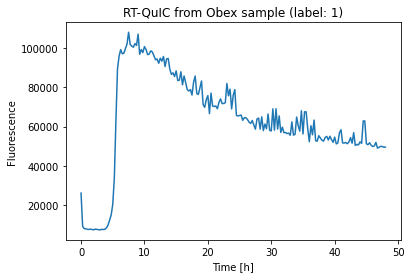

In [ ]:
idx = 0
view_curve(X[idx], timepoints_h, y[idx], sample[idx])

## Group columns by sample

In [ ]:
assert(len(X) == len(y))
assert(len(y) == len(sample))
assert(len(sample) == len(sample_id))
assert(len(sample_id) == len(well_name))
assert(len(well_name) == len(col_idx))


In [ ]:
# Pass 1: create samples dictionary
samples = {}

for i in range(len(y)):
    key = sample_id[i]
    if key not in samples:
        samples[key] = {}
        samples[key]['X'] = []
        samples[key]['y_list'] = []
        samples[key]['sample_list'] = []
        samples[key]['well_name_list'] = []
        samples[key]['col_idx_list'] = []
    
    samples[key]['X'].append(X[i].copy())
    samples[key]['y_list'].append(y[i].copy())
    samples[key]['sample_list'].append(sample[i])
    samples[key]['well_name_list'].append(well_name[i])
    samples[key]['col_idx_list'].append(col_idx[i])


In [ ]:
# Pass 2: integrity check on samples
keys_to_delete = set()

for key,val in samples.items():
    # Extract data for sample
    X_sample = samples[key]['X']
    y_list = samples[key]['y_list']
    sample_list = samples[key]['sample_list']
    well_name_list = samples[key]['well_name_list']
    col_idx_list = samples[key]['col_idx_list']

    # Integrity check - all lists need to be the same length
    assert(len(X_sample) == len(y_list))
    assert(len(y_list) == len(sample_list))
    assert(len(sample_list) == len(well_name_list))
    assert(len(well_name_list) == len(col_idx_list))

    # Add count
    samples[key]['well_count'] = len(y_list)

    # Check all labels are the same
    if sum(y_list)!=0 and sum(y_list)!=len(y_list):
        print(y_list)
        keys_to_delete.add(key)
    else:
        samples[key]['y'] = y_list[0]
    
    # Convert grouped sample data to array
    samples[key]['X'] = np.array(X_sample)

    # Check if all samples are the same
    sample_list = np.array(sample_list)
    if not np.all(sample_list == sample_list[0]):
        print(sample_list)
        keys_to_delete.add(key)
    else:
        samples[key]['sample'] = sample_list[0]

# Delete samples that failed integrity check
for key in keys_to_delete:
    samples.pop(key)

print("Deleted %i sample(s) due to label inconsistency" % (len(keys_to_delete),))


[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['Obex' 'Obex' 'Obex' 'Obex' 'Obex' 'Obex' 'Obex' 'Obex' 'Soil' 'Soil'
 'Soil' 'Soil' 'Soil' 'Soil' 'Soil']
Deleted 1 sample(s) due to label inconsistency


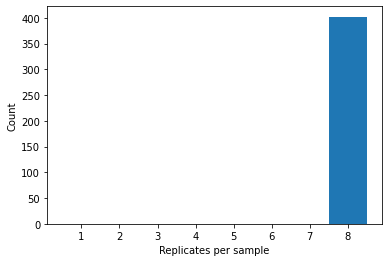

In [ ]:
# Summarize data
replicate_sizes = []
labels = []

for key,val in samples.items():
    replicate_sizes.append(val['well_count'])
    labels.append(val['y'])

# Show sample sizes
replicate_sizes = np.array(replicate_sizes)

plt.hist(replicate_sizes, bins=np.arange(1,10,1)-0.5)
plt.ylabel('Count')
plt.xlabel('Replicates per sample');
plt.show()

In [ ]:
len(labels)

402

In [ ]:
# Get grouped data - only take samples consisting of 8 replicates
X_grouped = []
y_grouped = []
sample_type = []
keys = []

for key,val in samples.items():
    x = val['X']
    replicate_size = val['well_count']
    if replicate_size == 8:
        X_grouped.append(x)
        y_grouped.append(val['y'])
        sample_type.append(val['sample'])
        keys.append(key)
    else:
        print("only %i replicates in %s" % (replicate_size, key))

X_grouped = np.array(X_grouped)
y_grouped = np.array(y_grouped)
sample_type = np.array(sample_type)
keys = np.array(keys)


In [ ]:
X_grouped.shape

(402, 8, 193)

## Pad wells with fluorescence values (remove nans)

### Padding toy example

In [ ]:
x = [np.nan]*3 + [1,2,3,4] + [np.nan]*5

In [ ]:
x

[nan, nan, nan, 1, 2, 3, 4, nan, nan, nan, nan, nan]

In [ ]:
# Find first nonnan index
first_valid_index = np.where(np.isfinite(x) == True)[0][0]

In [ ]:
first_valid_index

3

In [ ]:
# Find last nonnan index
last_valid_index = (~np.isnan(x)).cumsum(0).argmax(0)

In [ ]:
last_valid_index

6

In [ ]:
# Num starting nans
starting_nans = first_valid_index

In [ ]:
# Num ending nans
ending_nans = len(x) - last_valid_index - 1

In [ ]:
ending_nans

5

In [ ]:
# Truncate to valid indices
x = x[first_valid_index:last_valid_index+1]

In [ ]:
x

[1, 2, 3, 4]

In [ ]:
# Pad with edge values
x = np.pad(x, (starting_nans, ending_nans), 'edge')

In [ ]:
x

array([1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 4, 4])

### Real code

In [ ]:
# Pad ends
for i in range(X_grouped.shape[0]):
    # Pull item
    x_group = X_grouped[i].copy()
    for j in range(x_group.shape[0]):
        x = x_group[j].copy()
        # Find first nonnan index
        first_valid_index = np.where(np.isfinite(x) == True)[0][0]
        # Find last nonnan index
        last_valid_index = (~np.isnan(x)).cumsum(0).argmax(0)
        # Num starting nans
        starting_nans = first_valid_index
        # Num ending nans
        ending_nans = len(x) - last_valid_index - 1
        # Truncate to valid indices
        x = x[first_valid_index:last_valid_index+1]
        # Pad if needed with last value
        if len(x) < len(timepoints_h):
            X_grouped[i][j] = np.pad(x, (starting_nans, ending_nans), 'edge')
        # Enforce correct length
        assert(len(X_grouped[i][j]) == len(timepoints_h))


In [ ]:
# Check for nans
assert(not np.any(np.isnan(X_grouped)))

# One-split approach

## Split data

In [ ]:
X_grouped = np.swapaxes(X_grouped,1,2)

In [ ]:
X_train, X_test, y_train, y_test, sample_train, sample_test, keys_train, keys_test = train_test_split(X_grouped, y_grouped, sample_type, keys, test_size=0.25, stratify=y_grouped, random_state=42)


In [ ]:
np.mean(y_train)

0.26245847176079734

In [ ]:
np.mean(y_test)

0.25742574257425743

In [ ]:
len(y_test)

101

## Train model

In [ ]:
def make_model(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)

    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)

    dense1 = tf.keras.layers.Dense(64, activation = 'relu')(conv2)

    conv3 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(dense1)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.ReLU()(conv3)

    gap = tf.keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(gap)

    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train[0].shape)
#tf.keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 193, 8)]          0         
                                                                 
 conv1d (Conv1D)             (None, 193, 64)           1600      
                                                                 
 batch_normalization (BatchN  (None, 193, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 193, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 193, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 193, 64)          256       
 hNormalization)                                             

In [ ]:
epochs = 500
batch_size = 32

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25)


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/500
10/10 [==============================] - 12s 49ms/step - loss: 0.5191 - accuracy: 0.7874
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.3060 - accuracy: 0.9402
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.2418 - accuracy: 0.9302
Epoch 4/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1732 - accuracy: 0.9635
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1585 - accuracy: 0.9568
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1192 - accuracy: 0.9900
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1128 - accuracy: 0.9734
Epoch 8/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1083 - accuracy: 0.9767
Epoch 9/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1121 - accuracy: 0.9701
Epoch 10/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0923 - accuracy: 0.9734
Epoch 1

## Test evaluation

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 56ms/step


In [ ]:
y_pred = np.array([arr.item() for arr in y_pred])

In [ ]:
len(y_pred)

101

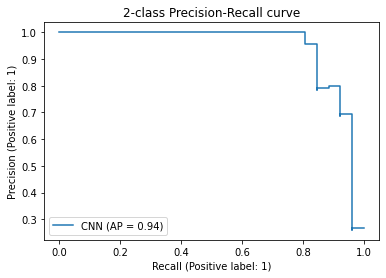

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred, name="CNN")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
preds_neg = []
preds_pos = []

for i in range(len(y_test)):
    y_predicted = y_pred[i]
    y_real = y_test[i]
    if y_real == 1:
        preds_pos.append(y_predicted)
    else:
        preds_neg.append(y_predicted)

<Axes: >

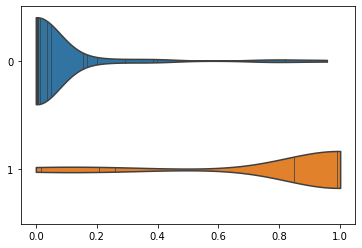

In [ ]:
sns.violinplot(data=[preds_neg, preds_pos], orient='h', inner='stick', cut=0)

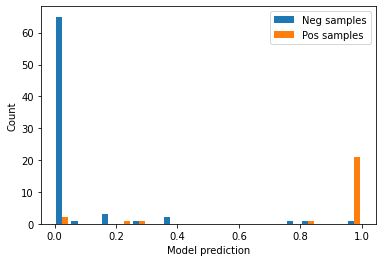

In [ ]:
plt.clf()
plt.hist([preds_neg, preds_pos], range=(0,1), bins=20, label=['Neg samples', 'Pos samples'])
plt.xlabel("Model prediction")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

Results based on binarized output

In [ ]:
y_pred_binarized = (y_pred >= 0.5)

In [ ]:
print(classification_report(y_test, y_pred_binarized, target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.95      0.96      0.95        75
         pos       0.88      0.85      0.86        26

    accuracy                           0.93       101
   macro avg       0.91      0.90      0.91       101
weighted avg       0.93      0.93      0.93       101



In [ ]:
f1_score(y_test, y_pred_binarized)

0.8627450980392156

## Error analysis

### Sample types of errors vs. correct predictions

In [ ]:
# Collect indices of errors
error_idx = []
for i in range(len(y_pred_binarized)):
    if y_pred_binarized[i] != y_test[i]:
        error_idx.append(i)

error_samples = np.array(sample_test)[error_idx]
d_error = dict(Counter(error_samples))
for key, val in d_error.items():
    d_error[key] = val / len(error_samples)
print("Sample type distribution for errors")
d_error

Sample type distribution for errors


{'Soil': 0.8571428571428571, 'RPLN': 0.14285714285714285}

In [ ]:
error_idx

[21, 32, 40, 53, 55, 59, 60]

In [ ]:
correct_samples = np.array(sample_test)[~np.array(error_idx)]
d_correct = dict(Counter(correct_samples))
for key, val in d_correct.items():
    d_correct[key] = val / len(correct_samples)
print("Sample type distribution for correct predictions")
d_correct

Sample type distribution for correct predictions


{'Soil': 0.7142857142857143,
 'Ear': 0.14285714285714285,
 'RPLN': 0.14285714285714285}

In [ ]:
assert(list(d_correct.keys()).sort() == list(d_error.keys()).sort())

In [ ]:
# plt.clf()

# keys = list(d_correct.keys())
# correct = list(d_correct.values())
# error = list(d_error.values())

# output = {}
# for i, key in enumerate(keys):
#     output[key] = [correct[i], error[i]]

# df = pd.DataFrame(output, index=['Correct', 'Error'])

# df.plot(kind='bar', stacked=True)
# plt.ylabel('Fraction')
# plt.title('Sample type distributions')

# ax = plt.gca()
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(1, 0.5))
# plt.savefig("sample_types.png", bbox_inches='tight', dpi=400)

### Model introspection

In [ ]:
# Get false negative item
idx = error_idx[0]
x = np.array([X_test[idx]])[0]


In [ ]:
x.shape

(193, 8)

In [ ]:
def get_grads(x):
    # Shape input
    x = x.reshape(1, -1, 8)

    # Cast as tf variable
    var = tf.Variable(x, dtype=float)

    # Compute gradients
    with tf.GradientTape() as tape:
        pred = model(var, training=False)
        class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
        loss = pred[0][class_idxs_sorted[0]]
    grads = tape.gradient(loss, var)

    # Absolute value
    dgrad_abs = tf.math.abs(grads)
    dgrad_max_ = np.max(dgrad_abs)

    # Normalize to range between 0 and 1
    arr_min, arr_max  = np.min(dgrad_abs), np.max(dgrad_abs)
    grad_eval = (dgrad_abs - arr_min) / (arr_max - arr_min + 1e-18)

    # Extract as array
    grad_eval = grad_eval.numpy()

    return grad_eval

In [ ]:
get_grads(x)[0].shape

(193, 8)

In [ ]:
def view_curve_grouped_imp(x, timepoints_h, y=None, sample=None, well_name=None, pred=None, save=False):
    plt.clf()
    x = x.reshape(1, -1, 8)
    grads = get_grads(x)[0]

    perc = np.percentile(grads, 90) 

    for i in range(8):
        plt.plot(timepoints_h, x[0,:,i], color='grey')

        gr = grads[:,i]
        mask = gr > perc
        plt.scatter(np.array(timepoints_h)[mask], x[0,:,i][mask], s=40, facecolors='none', edgecolors='b', alpha=0.7)
    
    plt.xlabel("Time [h]")
    plt.ylabel("Fluorescence")

    title = 'RT-QuIC'
    if sample is not None:
        title += ' from %s sample' % (sample,)
    if y is not None:
        title += ' (label: %i)' % (y,)
    # if well_name is not None:
    #     title += ' (well: %s)' % (well_name,)
    if pred is not None:
        title += ' (pred: %.2f)' % (pred,)

    plt.title(title)

    if save:
        filename = ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
        plt.savefig(filename + ".png", bbox_inches='tight', dpi=400)



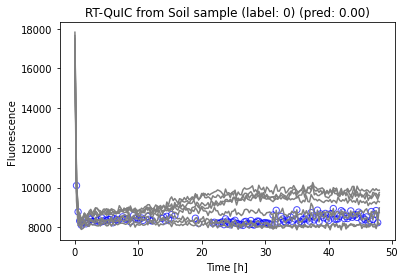

In [ ]:
# Random idx
correct_idx = np.delete(range(len(y_test)), error_idx)
idx = np.random.randint(len(correct_idx),size=1)[0]

view_curve_grouped_imp(X_test[idx], timepoints_h, y_test[idx], sample_test[idx], pred=y_pred[idx])

In [ ]:
# for idx in error_idx:
#     view_curve_grouped_imp(X_test[idx], timepoints_h, y_test[idx], sample_test[idx], pred=y_pred[idx], save=True)

## More model introspection

In [ ]:
def view_replicates(x, timepoints_h, y=None, sample=None, well_name=None, pred=None, importance=False, save=False):

    plt.clf()

    fig, axs = plt.subplots(ncols=8)

    for i,ax1 in enumerate(axs):
        curve = x[:,i]

        # Plot curve
        ax1.plot(timepoints_h, curve)
        ax1.set_ylim(0,np.max(x)+10000)
        ax1.tick_params(axis='x', which='major', labelsize=6)
        if i>0:
            ax1.set_yticks([])

        # Plot importance
        if importance:
            ax2 = ax1.twinx()
            ax2.plot(timepoints_h, get_grads(x)[0,:,i], alpha=0.6, color='green', linewidth=0.5)
            ax2.set_ylim(0,1)
            if i != 7:
                ax2.set_yticks([])

        title = 'RT-QuIC'
        if sample is not None:
            title += ' from %s sample' % (sample,)
        if y is not None:
            title += ' (label: %i)' % (y,)
        # if well_name is not None:
        #     title += ' (well: %s)' % (well_name,)
        if pred is not None:
            title += ' (pred: %.2f)' % (pred,)

    plt.suptitle(title)

    fig.text(0.5, 0.01, 'Time [h]', ha='center')
    fig.text(0.06, 0.5, 'Fluorescence', va='center', rotation='vertical')
    
    if importance:
        fig.text(0.94, 0.5, 'Feature importance', va='center', rotation='vertical', color='green')

    fig.set_size_inches(16, 2.5)
    if save:
        filename = ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
        plt.savefig(filename + ".png", bbox_inches='tight', dpi=600)



31


<Figure size 432x288 with 0 Axes>

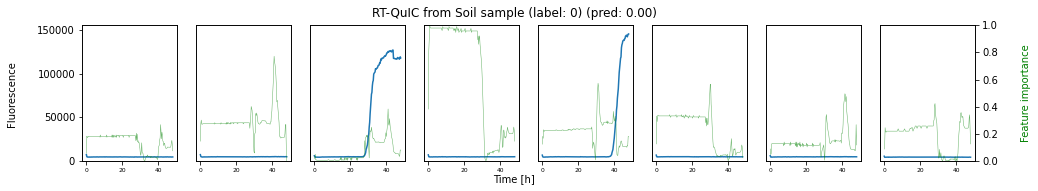

In [ ]:
# Random idx
correct_idx = np.delete(range(len(y_test)), error_idx)
idx = np.random.randint(len(correct_idx),size=1)[0]
print(idx)

view_replicates(X_test[idx], timepoints_h, y_test[idx], sample_test[idx], pred=y_pred[idx], importance=True)

<Figure size 432x288 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

<Figure size 1152x180 with 0 Axes>

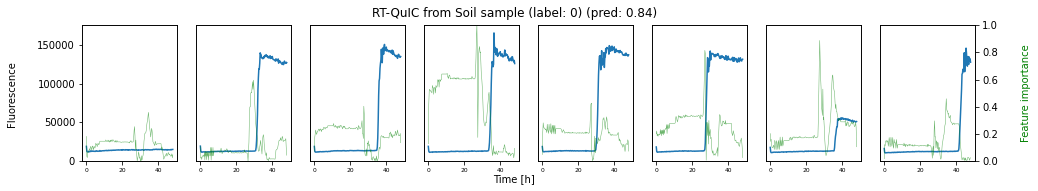

In [ ]:
for idx in error_idx:
    view_replicates(X_test[idx], timepoints_h, y_test[idx], sample_test[idx], pred=y_pred[idx], save=True, importance=True)

# Learning curves & Cross-validation approach

In [ ]:
X_temp, y_temp = shuffle(X_grouped, y_grouped, random_state=random.getrandbits(32))

In [ ]:
X_temp.shape

(402, 193, 8)

In [ ]:
def make_model2(input_shape):
    input_layer = tf.keras.layers.Input(input_shape)

    conv1 = tf.keras.layers.Conv1D(filters=64, kernel_size=20)(input_layer)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.ReLU()(conv1)
    conv1 = tf.keras.layers.MaxPooling1D()(conv1)

    conv2 = tf.keras.layers.Conv1D(filters=48, kernel_size=10)(conv1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.ReLU()(conv2)
    conv2 = tf.keras.layers.MaxPooling1D()(conv2)
    
    conv3 = tf.keras.layers.Conv1D(filters=32, kernel_size=5)(conv2)
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.ReLU()(conv3)
    conv3 = tf.keras.layers.MaxPooling1D()(conv3)

    head = tf.keras.layers.Flatten()(conv3)
    head = tf.keras.layers.Dense(64, activation=None)(head)
    head = tf.keras.layers.BatchNormalization()(head)
    head = tf.keras.layers.ReLU()(head)
    # head = tf.keras.layers.Dropout(0.2)(head)

    head = tf.keras.layers.Dense(32, activation=None)(head)
    head = tf.keras.layers.BatchNormalization()(head)
    head = tf.keras.layers.ReLU()(head)
    # head = tf.keras.layers.Dropout(0.2)(head)

    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(head)

    return tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model = make_model2(input_shape=X_temp[0].shape)
#tf.keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 193, 8)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 174, 64)           10304     
                                                                 
 batch_normalization_5 (Batc  (None, 174, 64)          256       
 hNormalization)                                                 
                                                                 
 re_lu_5 (ReLU)              (None, 174, 64)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 87, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 78, 48)            3076

In [ ]:
def get_scores(fraction):
    # Set random state
    r = random.getrandbits(32)

    # Shuffle data
    # Not sure if we want this - simulating more data is achieved by retaining order
    #X_temp, y_temp = shuffle(X_grouped, y_grouped, random_state=r)

    # Limit data based on fraction
    X_partial = X_temp[:int(len(y_temp)*fraction)]
    y_partial = y_temp[:int(len(y_temp)*fraction)]
  
    # Stratified 10-fold CV
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=r)
    count = 0
    results = []

    for train, test in skf.split(X_partial, y_partial):
        # Get data from indices
        X_train = X_partial[train]
        X_test = X_partial[test]
        y_train = y_partial[train]
        y_test = y_partial[test]

        # Re-make model
        tf.keras.backend.clear_session()
        model = make_model2(input_shape=X_train[0].shape)
        
        epochs = 500
        batch_size = 32

        callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=25)

        model.compile(
            optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"],
        )

        # Train
        history = model.fit(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            callbacks=[callback]
        )

        # Test score (F1 or AP)
        y_pred = model.predict(X_test, verbose=0)
        y_pred = np.array([arr.item() for arr in y_pred])
        #y_pred_binarized = (y_pred >= 0.5)
        score_test = average_precision_score(y_test, y_pred)
        n_test = len(y_pred)

        # Train score
        y_pred_train = model.predict(X_train, verbose=0)
        y_pred_train = np.array([arr.item() for arr in y_pred_train])
        #y_pred_train_binarized = (y_pred_train >= 0.5)
        score_train = average_precision_score(y_train, y_pred_train)
        n_train = len(y_pred_train)

        # Save final models
        if fraction == 1.0:
            model.save("model_fold_%i.tf" % (count,))

        # Prep for next iteration
        print("Fold %i/10 - Train score (n=%i), Test score (n=%i): %.3f, %.3f" % (count+1, n_train, n_test, score_train, score_test))
        results.append((fraction, count, score_train, score_test, (n_train, n_test), (y_train, y_pred_train, y_test, y_pred, X_test)))
        count += 1

    return results


In [ ]:
fractions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]
#fractions = [1]
outputs = []

# Run 10-fold CV at each fraction level
for fraction in fractions:
    print("%i%%" % (fraction*100,))
    outputs.extend(get_scores(fraction))

with open("CV_outputs.pkl", 'wb') as pfile:
    pickle.dump(outputs, pfile, protocol=pickle.HIGHEST_PROTOCOL)

10%
Fold 1/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
Fold 2/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
Fold 3/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
Fold 4/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
Fold 5/10 - Train score (n=36), Test score (n=4): 1.000, 0.333
Fold 6/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
Fold 7/10 - Train score (n=36), Test score (n=4): 1.000, 0.500
Fold 8/10 - Train score (n=36), Test score (n=4): 1.000, 0.833
Fold 9/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
Fold 10/10 - Train score (n=36), Test score (n=4): 1.000, 1.000
20%
Fold 1/10 - Train score (n=72), Test score (n=8): 1.000, 0.667
Fold 2/10 - Train score (n=72), Test score (n=8): 0.907, 0.643
Fold 3/10 - Train score (n=72), Test score (n=8): 1.000, 0.583
Fold 4/10 - Train score (n=72), Test score (n=8): 1.000, 0.500
Fold 5/10 - Train score (n=72), Test score (n=8): 1.000, 0.750
Fold 6/10 - Train score (n=72), Test score (n=

Fold 1/10 - Train score (n=361), Test score (n=41): 1.000, 0.965


Fold 2/10 - Train score (n=361), Test score (n=41): 1.000, 0.975


Fold 3/10 - Train score (n=362), Test score (n=40): 1.000, 0.916


Fold 4/10 - Train score (n=362), Test score (n=40): 1.000, 0.881


Fold 5/10 - Train score (n=362), Test score (n=40): 1.000, 0.917


Fold 6/10 - Train score (n=362), Test score (n=40): 1.000, 0.935


Fold 7/10 - Train score (n=362), Test score (n=40): 1.000, 1.000


Fold 8/10 - Train score (n=362), Test score (n=40): 1.000, 1.000


Fold 9/10 - Train score (n=362), Test score (n=40): 1.000, 0.984


Fold 10/10 - Train score (n=362), Test score (n=40): 1.000, 0.856


## Final performance

In [ ]:
X_cv = []
y_actual_cv = []
y_pred_cv = []

# Aggregate predictions
for fold_results in outputs:
    # Unpack tuple
    fraction, count, score_train, score_test, n_tup, data_tup = fold_results
    n_train, n_test = n_tup
    y_train, y_pred_train, y_test, y_pred, X_test = data_tup
    
    # Only use final model folds
    if fraction != 1.0:
        continue
    
    # Collect test fold results
    X_cv.extend(X_test)
    y_actual_cv.extend(y_test)
    y_pred_cv.extend(y_pred)

# Convert aggregated predictions to arrays
X_cv = np.array(X_cv)
y_actual_cv = np.array(y_actual_cv)
y_pred_cv = np.array(y_pred_cv)

# Check aggregated predictions
assert(X_grouped.shape == X_cv.shape)
assert(len(y_grouped) == len(y_actual_cv))
assert(len(y_grouped) == len(y_pred_cv))



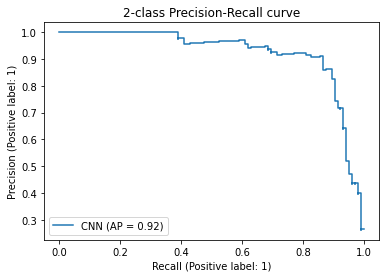

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_actual_cv, y_pred_cv, name="CNN")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [ ]:
preds_neg = []
preds_pos = []

for i in range(len(y_actual_cv)):
    y_predicted = y_pred_cv[i]
    y_real = y_actual_cv[i]
    if y_real == 1:
        preds_pos.append(y_predicted)
    else:
        preds_neg.append(y_predicted)

<Axes: >

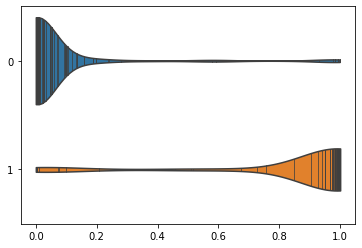

In [ ]:
sns.violinplot(data=[preds_neg, preds_pos], orient='h', inner='stick', cut=0)

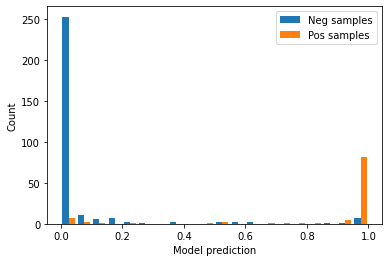

In [ ]:
plt.clf()
plt.hist([preds_neg, preds_pos], range=(0,1), bins=20, label=['Neg samples', 'Pos samples'])
plt.xlabel("Model prediction")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

In [ ]:
y_pred_binarized = (y_pred_cv >= 0.2)

print(classification_report(y_actual_cv, y_pred_binarized, target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.97      0.93      0.95       297
         pos       0.83      0.90      0.86       105

    accuracy                           0.93       402
   macro avg       0.90      0.92      0.91       402
weighted avg       0.93      0.93      0.93       402



In [ ]:
f1_score(y_actual_cv, y_pred_binarized)

0.8636363636363636

## Plot learning curves

In [ ]:
lc_train_data = {}
lc_test_data = {}

for output in outputs:
    fraction, count, score_train, score_test, _, _ = output

    if fraction not in lc_train_data:
        lc_train_data[fraction] = []
        lc_test_data[fraction] = []
    
    # Add actual scores
    lc_train_data[fraction].append(score_train)
    lc_test_data[fraction].append(score_test)
  

    # TODO: add bootstrapped scores
    

x = []
score_train_min = []
score_train_mean = []
score_train_max = []
score_test_min = []
score_test_mean = []
score_test_max = []

for fraction in lc_train_data.keys():
    x.append(fraction)
    score_train_data = lc_train_data[fraction]
    score_test_data = lc_test_data[fraction]
    score_train_min.append(np.min(score_train_data))
    score_train_mean.append(np.mean(score_train_data))
    score_train_max.append(np.max(score_train_data))
    score_test_min.append(np.min(score_test_data))
    score_test_mean.append(np.mean(score_test_data))
    score_test_max.append(np.max(score_test_data))


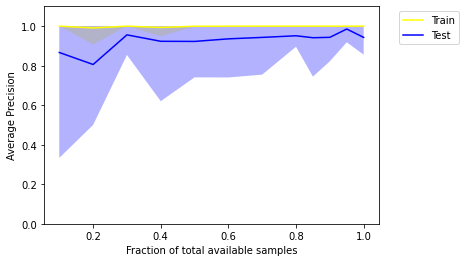

In [ ]:
plt.clf()
plt.plot(x, score_train_mean, label="Train", c="yellow")
plt.fill_between(x, score_train_min, score_train_max ,alpha=0.3, facecolor="yellow")
plt.plot(x, score_test_mean, label="Test", c="blue")
plt.fill_between(x, score_test_min, score_test_max ,alpha=0.3, facecolor="blue")
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0))
plt.ylim((0,1.1))
plt.xlabel("Fraction of total available samples")
plt.ylabel("Average Precision")
plt.savefig("LC.png", bbox_inches='tight', dpi=600)

In [ ]:
# move files into new directory and zip

In [ ]:
#%cd ..

/content


In [ ]:
#!tar -zcvf model2.tar.gz model2/ 

model2/
model2/model_fold_7.tf/
model2/model_fold_7.tf/keras_metadata.pb
model2/model_fold_7.tf/assets/
model2/model_fold_7.tf/saved_model.pb
model2/model_fold_7.tf/variables/
model2/model_fold_7.tf/variables/variables.data-00000-of-00001
model2/model_fold_7.tf/variables/variables.index
model2/model_fold_7.tf/fingerprint.pb
model2/CV_outputs.pkl
model2/model_fold_0.tf/
model2/model_fold_0.tf/keras_metadata.pb
model2/model_fold_0.tf/assets/
model2/model_fold_0.tf/saved_model.pb
model2/model_fold_0.tf/variables/
model2/model_fold_0.tf/variables/variables.data-00000-of-00001
model2/model_fold_0.tf/variables/variables.index
model2/model_fold_0.tf/fingerprint.pb
model2/model_fold_9.tf/
model2/model_fold_9.tf/keras_metadata.pb
model2/model_fold_9.tf/assets/
model2/model_fold_9.tf/saved_model.pb
model2/model_fold_9.tf/variables/
model2/model_fold_9.tf/variables/variables.data-00000-of-00001
model2/model_fold_9.tf/variables/variables.index
model2/model_fold_9.tf/fingerprint.pb
model2/model_fol